# Introduction

In this task, EDA is performed on the ["Housing Price" dataset] (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) using 1D and 2D visualization techniques. The "Housing Price" dataset contains various information about properties for sale, such as location zone, number of bedrooms, land size, and more.



# Exploratory Data Analysis

## Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data based on their respective directories.
house = pd.read_csv('/content/drive/MyDrive/File Pelatihan/Pelatihan Kelas.com/Data Final Project/train_house.csv', index_col= 0)

In [ ]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Drop variabel NaN
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


There are several columns with missing values.

In [ ]:
house = house.dropna(axis=1)
house.head(20)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,320,0,0,700,10,2009,WD,Normal,143000
7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,228,0,0,0,350,11,2009,WD,Normal,200000
9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,205,0,0,0,0,4,2008,WD,Abnorml,129900


In [ ]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
LotArea,0,0.0
Street,0,0.0
LotShape,0,0.0
LandContour,0,0.0
Utilities,0,0.0
LotConfig,0,0.0
LandSlope,0,0.0
Neighborhood,0,0.0


There are no more missing values

In [ ]:
# Separating the data into numerical and categorical.

In [ ]:
# Separating the data into numerical
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# Separating the data into categorical
house_categorical = house.drop(num_cols, axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


# 1D Visualization

## Variabel Kategorikal

### Utilities

* `Utilities` Contains information about the amenities available in the property

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

<Axes: xlabel='Utilities', ylabel='proportion'>

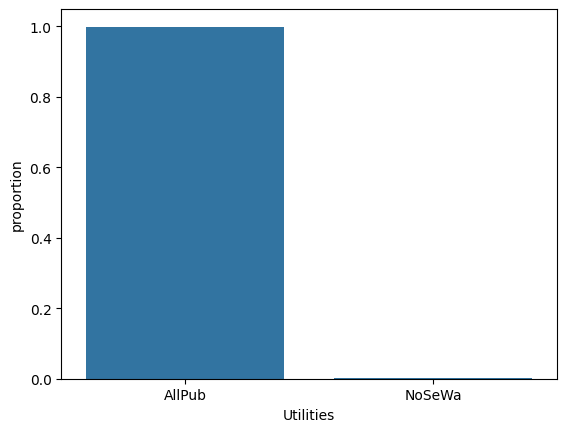

In [ ]:
sns.barplot(x=house_categorical['Utilities'].value_counts().index,
                 y=house_categorical['Utilities'].value_counts(normalize = True))

### HouseStyle

HouseStyle: Property style (e.g., single-story, two-story, etc)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<Axes: xlabel='HouseStyle', ylabel='proportion'>

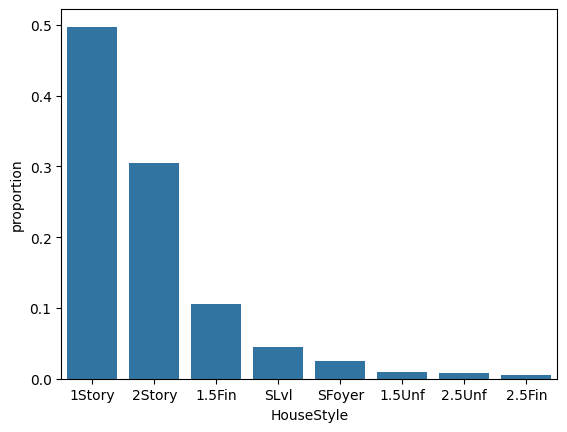

In [ ]:
sns.barplot(x=house_categorical['HouseStyle'].value_counts().index,
                 y=house_categorical['HouseStyle'].value_counts(normalize = True))

### ExterQual

ExterQual: Exterior material quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

<Axes: xlabel='ExterQual', ylabel='proportion'>

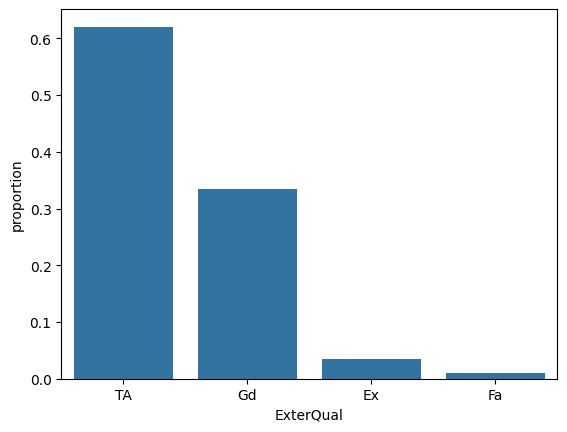

In [ ]:
sns.barplot(x=house_categorical['ExterQual'].value_counts().index,
                 y=house_categorical['ExterQual'].value_counts(normalize = True))

#### **Analysis of Categorical Variables**
Based on the barplot, the following observations were made:

1. Utilities or Public Facilities

The majority of properties fall under the "AllPub" category, meaning they have full access to public services such as electricity, gas, water, and sewage. Meanwhile, only a small portion of properties belong to the "NoSeWa" category, which means they only have electricity and gas, without water and sewage services. This indicates that almost all homes are equipped with complete public infrastructure.

2. HouseStyle or Property Style

The most common house style is "1Story" (single-story), followed by "2Story" (two-story). The least common type is "2.5Fin" (two and a half stories with a finished space). This suggests that most buyers tend to prefer single-story homes.


3. ExterQual or Exterior Quality

The most dominant exterior quality is "TA" (Typical/Average), followed by "Gd" (Good). The categories "Ex" (Excellent) and "Fa" (Fair) cover only a small portion of homes. This shows that most homes have exterior quality ranging from average to good.

## Variabel Numerikal

### SalePrice

* SalePrice is the target variable to be predicted
* Physically, this refers to the sale price of the property

<ipython-input-20-967d73e0872b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


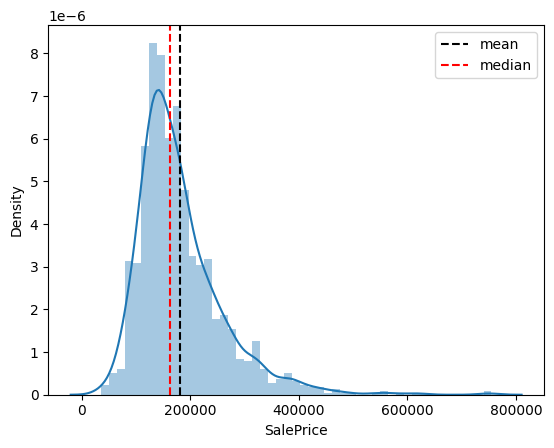

In [ ]:
x = house_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analysis of the `SalePrice` Variable**

The distribution of house prices (SalePrice) shows a positively skewed pattern, where most homes are sold at low to medium price ranges, typically below $200,000. This is indicated by the mean being slightly higher than the median, which suggests that there are a few homes with very high prices pulling the average upward. The significant price variation is also visible from the data spread, indicating that only a small number of homes are priced highly.

Thus, it can be concluded that the majority of house prices are in the low to medium price range, with only a small portion falling in the high-price range.

### GrLivArea

* GrLivArea contains information about the above-ground living area (excluding the basement).
* The unit of measurement used is square feet.

<ipython-input-22-5354c22f677f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


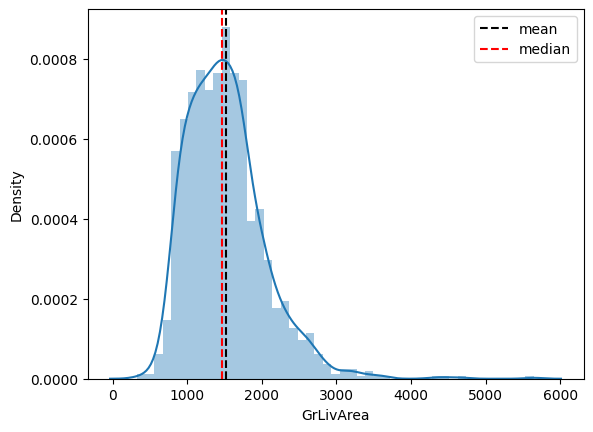

In [ ]:
x = house_numeric["GrLivArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analysis of the `GrlivArea` Variable**

The distribution of the GrLivArea variable shows a positively skewed pattern, where most homes have a living area between 1,000 and 2,000 square feet. The mean being higher than the median indicates that there are a few homes with very large areas that pull the average upwards. The relatively large standard deviation also reflects significant variation in the living area sizes among homes.

### GarageArea

* GarageArea contains information about the size of the garage (if available).
* The unit of measurement used is square feet.

<ipython-input-24-8ff4553deb91>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 480.0
Mean: 472.9801369863014
Std Dev: 213.80484145338076


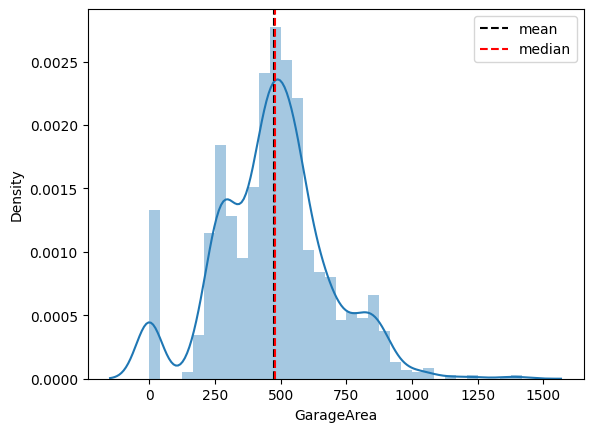

In [ ]:
x = house_numeric["GarageArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analysis of the `GarageArea` Variable**

The distribution of the GarageArea variable appears to be nearly symmetric, although the median value (480.0) is slightly higher than the mean (472.98), which suggests a mild negative skew. However, visually, the distribution still appears balanced on both sides, so it can generally be considered close to normal. Most homes have garage sizes between 400 and 600 square feet, making this range the most dominant. Additionally, the standard deviation of 213.80 indicates that garage sizes vary quite a bit among homes.

## Data Processing of Numerical Variables

<ipython-input-28-ae503ef4b763>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


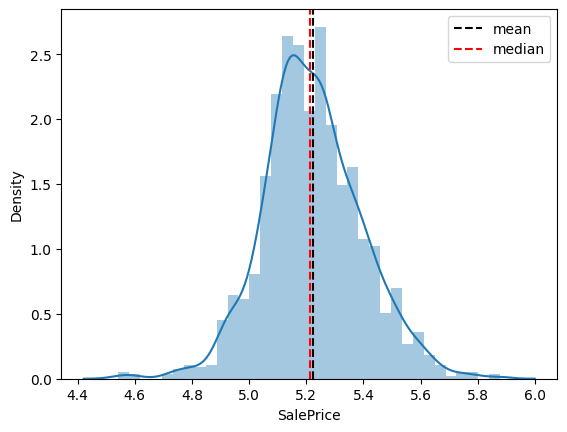

In [ ]:
x = np.log10(house_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

<ipython-input-27-79b3bafcefaf>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.1448591086966387


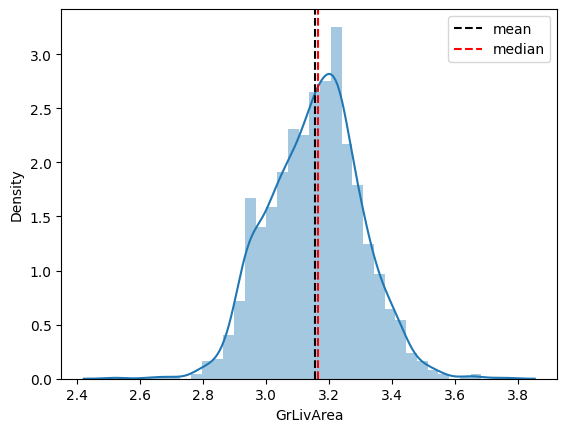

In [ ]:
x = np.log10(house_numeric["GrLivArea"])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

<ipython-input-30-02e7a6283c60>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 2.6848453616444123
Mean: 2.6696154158200915
Std Dev: 0.16427840573730204


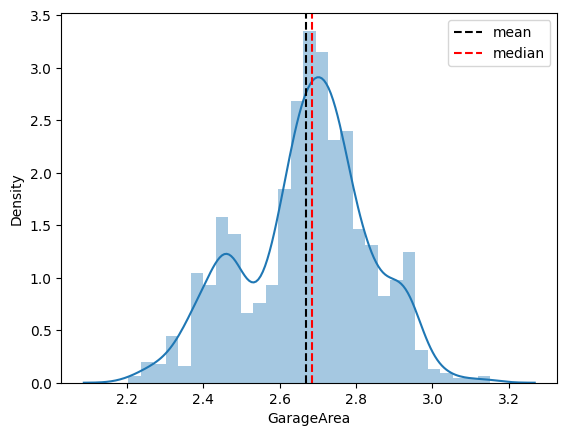

In [ ]:
x = house_numeric["GarageArea"][house_numeric["GarageArea"] > 0]
x = np.log10(x)
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Explanation and Analysis of Data Processing**

A logarithmic (log-10) transformation was applied to the variables SalePrice, GrLivArea, and GarageArea to address the positively skewed distributions, where the mean is higher than the median—indicating an imbalance caused by extreme values. The transformation results show that all three variables became more symmetrical and closer to a normal distribution, as evidenced by the minimal difference between the mean and median. For SalePrice and GrLivArea, this transformation significantly reduced skewness, while GarageArea, which was already relatively balanced, still maintained a good distribution after the transformation. Overall, this log transformation helps normalize the data, stabilize variance, and enhance the reliability of both statistical analysis and predictive modeling.

# 2D Visualization

## `GrLivArea` with `SalePrice`

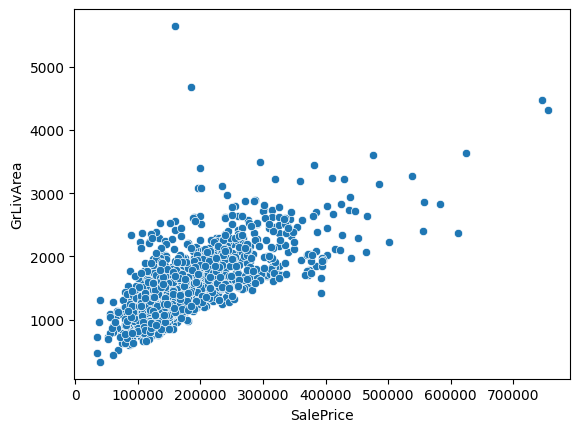

In [ ]:
ax = sns.scatterplot(y="GrLivArea", x="SalePrice", data=house_numeric)
plt.show()

## `GarageArea` with `SalePrice`

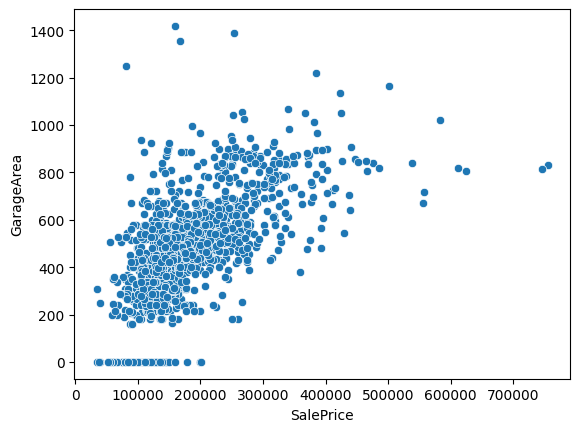

In [ ]:
ax = sns.scatterplot(y="GarageArea", x="SalePrice", data=house_numeric)
plt.show()

#### **Hypothesis on Variable Relationships**

* Plot 1

  It can be observed that the larger the living area (GrLivArea), the higher the house selling price (SalePrice). The data distribution shows a fairly consistent upward trend, although there are a few outliers, such as houses with very large areas sold at relatively low prices. This indicates that GrLivArea has strong potential as a predictor of SalePrice.

* Plot 2

  The relationship between garage size (GarageArea) and SalePrice also shows a positive trend, though the data is more spread out compared to GrLivArea. This means that while houses with larger garages tend to sell at higher prices, the relationship is not as strong as that between living area and selling price. Some data points show high house prices despite small garages, or vice versa. The presence of several houses without garages (GarageArea = 0) may also affect the correlation strength.

* Summary

  Overall, it can be initially concluded that living area (GrLivArea) appears to have a stronger correlation with SalePrice than garage size (GarageArea).